# Adaboost 
- 以决策树桩(单层决策树)作为基分类器的Adaboost

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

## Decesion tree stump(决策树桩) 

In [18]:
class stump_classify:
    def __init__(self, train_X, train_y, valid_X = None, valid_y = None):
        """
        type train_X:[[]]
        type train_y:[]
        type valid_X:[[]]
        type valid_y:[]
        """
        self.train_X = train_X
        self.train_y = train_y
        self.valid_X = valid_X
        self.valid_y = valid_y
    def fit(self, num_steps, wrong_wei):
        """
        type num_steps:int, 属性值空间的划分次数
        """
        m , n = self.train_X.shape
        thread_ineqs = ["left_true","right_true"]
        max_score = -float("inf")
        parameter_dic = {}
        for i in range(n):
            cur_dimen_min = self.train_X[:,i].min()
            cur_dimen_max = self.train_X[:,i].max()
            thread_range = cur_dimen_max - cur_dimen_min # 当前属性的值区间
            for thread_val in np.linspace(cur_dimen_min,cur_dimen_max,num_steps):
                for thread_ineq in thread_ineqs:
                    pre = self.predict(dimen=i, thread_val=thread_val, thread_ineq= thread_ineq,\
                                       test_X=self.train_X)
                    cur_score = self.evaluate(self.train_y, pre)
                    if cur_score > max_score:
                        max_score = cur_score
                        parameter_dic['dimen'] = i
                        parameter_dic['thread_val'] = thread_val
                        parameter_dic['thread_ineq'] = thread_ineq
        return parameter_dic
    
    # 三个参数可以看做是学习得到的三个参数，最终的模型也是使用这三个参数来表示的
    def predict(self, dimen, thread_val, thread_ineq, test_X):
        """
        type dimen:int, 使用哪个维度作为划分属性
        type thread_val:float, 使用 dimen>thread_val 与 dimen<=thread_val 划分为两部分
        type thread_ineq:str, 表明 dimen>thread_val 属于那个类别
        rtype [], 预测结果
        """
        m, _ = test_X.shape
        pre = np.zeros(m)
        if thread_ineq == "left_true":
            pre[test_X[:, dimen] < thread_val] = 1
        else:
            pre[test_X[:, dimen] >= thread_val] = 1
        return pre
    
    def evaluate(self, test_y, pre, score=None):
        if score == None:
            return float(np.sum(test_y == pre)) / len(test_y) # 默认以准确率作为评价指标
        else:
            return score(test_y, pre)

### 测试 stump-tree(决策树桩) 

In [19]:
def load_simple_data():
    data = np.array(
        [[1, 2.1],
         [2, 1.1],
         [1.3, 1],
         [1, 1],
         [2, 1]])
    label = np.array([1, 1, 0, 0, 1])
    return (data, label)

In [20]:
x, y = load_simple_data()

In [21]:
stump = stump_classify(x, y)

In [22]:
para = stump.fit(5)

In [23]:
stump.predict(test_X=x, **para)

array([0., 1., 0., 0., 1.])

In [24]:
print para

{'dimen': 0, 'thread_ineq': 'right_true', 'thread_val': 1.5}


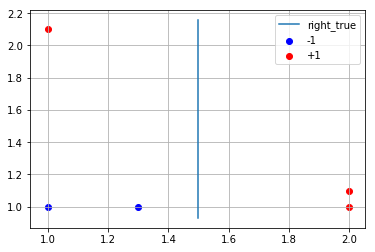

In [34]:
plt.scatter(x[y == 0,0], x[y==0,1], c='blue', label="-1")
plt.scatter(x[y == 1,0], x[y==1,1], c='red', label="+1")
ylim = plt.ylim()
plt.plot([para['thread_val'],para['thread_val']],ylim, label=para['thread_ineq'])
plt.legend()
plt.grid()

蓝色直线表示右边部分被分类为正类，左边被分类为负类